In [17]:
#Author Jeffrey Tang
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [13]:
#Data Preprocessing
df = pd.read_csv('stack overflow data.csv')
df

,Id,Title,Body,Tags,CreationDate,Y
0,34552656,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,<java><repeat>,2016-01-01 00:21:59,LQ_CLOSE
1,34552974,How to get all the child records from differen...,I am having 4 different tables like \r\nselect...,<sql><sql-server>,2016-01-01 01:44:52,LQ_EDIT
2,34553034,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,<java><optional>,2016-01-01 02:03:20,HQ
3,34553174,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...,2016-01-01 02:48:24,HQ
4,34553318,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",<swift><operators><whitespace><ternary-operato...,2016-01-01 03:30:17,HQ
...,...,...,...,...,...,...
59995,60467932,C++ The correct way to multiply an integer and...,<p>I try to multiply an integer by a double bu...,<c++>,2020-02-29 17:46:41,LQ_CLOSE
59996,60468018,How can I make a c# application outside of vis...,<p>I'm very new to programming and I'm teachin...,<c#><visual-studio>,2020-02-29 17:55:56,LQ_CLOSE
59997,60468378,WHY DJANGO IS SHOWING ME THIS ERROR WHEN I TRY...,*URLS.PY*\r\n //URLS.PY FILE\r\n fro...,<django><django-views><django-templates>,2020-02-29 18:35:39,LQ_EDIT
59998,60469392,PHP - getting the content of php page,<p>I have a controller inside which a server i...,<javascript><php><html>,2020-02-29 20:32:14,LQ_CLOSE


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            60000 non-null  int64 
 1   Title         60000 non-null  object
 2   Body          60000 non-null  object
 3   Tags          60000 non-null  object
 4   CreationDate  60000 non-null  object
 5   Y             60000 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.7+ MB


In [15]:
#df['Category']=pd.get_dummies(df['Y'])
df2 = pd.get_dummies(df['Y'])
df2

,HQ,LQ_CLOSE,LQ_EDIT
0,0,1,0
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
59995,0,1,0
59996,0,1,0
59997,0,0,1
59998,0,1,0


<AxesSubplot:xlabel='HQ', ylabel='count'>

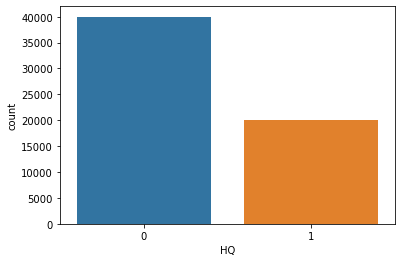

In [20]:
sns.countplot(x='HQ',data=df2)

In [22]:
df0 = df.drop(['Id', 'Title', 'Tags', 'CreationDate'], axis = 1)

df0

,Body,Y
0,<p>I'm already familiar with repeating tasks e...,LQ_CLOSE
1,I am having 4 different tables like \r\nselect...,LQ_EDIT
2,<p>I'd like to understand why Java 8 Optionals...,HQ
3,<p>I am attempting to overlay a title over an ...,HQ
4,"<p>The question is very simple, but I just cou...",HQ
...,...,...
59995,<p>I try to multiply an integer by a double bu...,LQ_CLOSE
59996,<p>I'm very new to programming and I'm teachin...,LQ_CLOSE
59997,*URLS.PY*\r\n //URLS.PY FILE\r\n fro...,LQ_EDIT
59998,<p>I have a controller inside which a server i...,LQ_CLOSE


In [31]:
#Text Processing Step
import re
import string
from string import punctuation
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\thefi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
def text_processing(message):
    
    Stopwords = stopwords.words('english')
    
    no_punctuation = [char for char in message if char not in string.punctuation]

    no_punctuation = ''.join(no_punctuation)
    
    return ' '.join([word for word in no_punctuation.split() if word.lower() not in Stopwords])

df0['text'] = df['Body'].apply(text_processing)
df.head()

,Body,Y,text
0,<p>I'm already familiar with repeating tasks e...,LQ_CLOSE,pIm already familiar repeating tasks every n s...
1,I am having 4 different tables like \r\nselect...,LQ_EDIT,4 different tables like select System select S...
2,<p>I'd like to understand why Java 8 Optionals...,HQ,pId like understand Java 8 Optionals designed ...
3,<p>I am attempting to overlay a title over an ...,HQ,pI attempting overlay title image image darken...
4,"<p>The question is very simple, but I just cou...",HQ,pThe question simple could find answerp pWhy d...


In [35]:
from sklearn.model_selection import train_test_split
X=df0['Body'].values
y=df0['Y'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)